In [1]:
# Importando librerias

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar mis datos
data = pd.read_csv("articulos_ml.csv")

In [3]:
# ver la cantidad de rengoles y columnas
data.shape

(161, 8)

In [4]:
# Ver los primeros rengoles de mi dataset
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
# Estadistica descriptiva de las variables númericas
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [7]:
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

array([[<Axes: title={'center': 'Word count'}>,
        <Axes: title={'center': '# of Links'}>],
       [<Axes: title={'center': '# of comments'}>,
        <Axes: title={'center': '# Images video'}>],
       [<Axes: title={'center': '# Shares'}>, <Axes: >]], dtype=object)

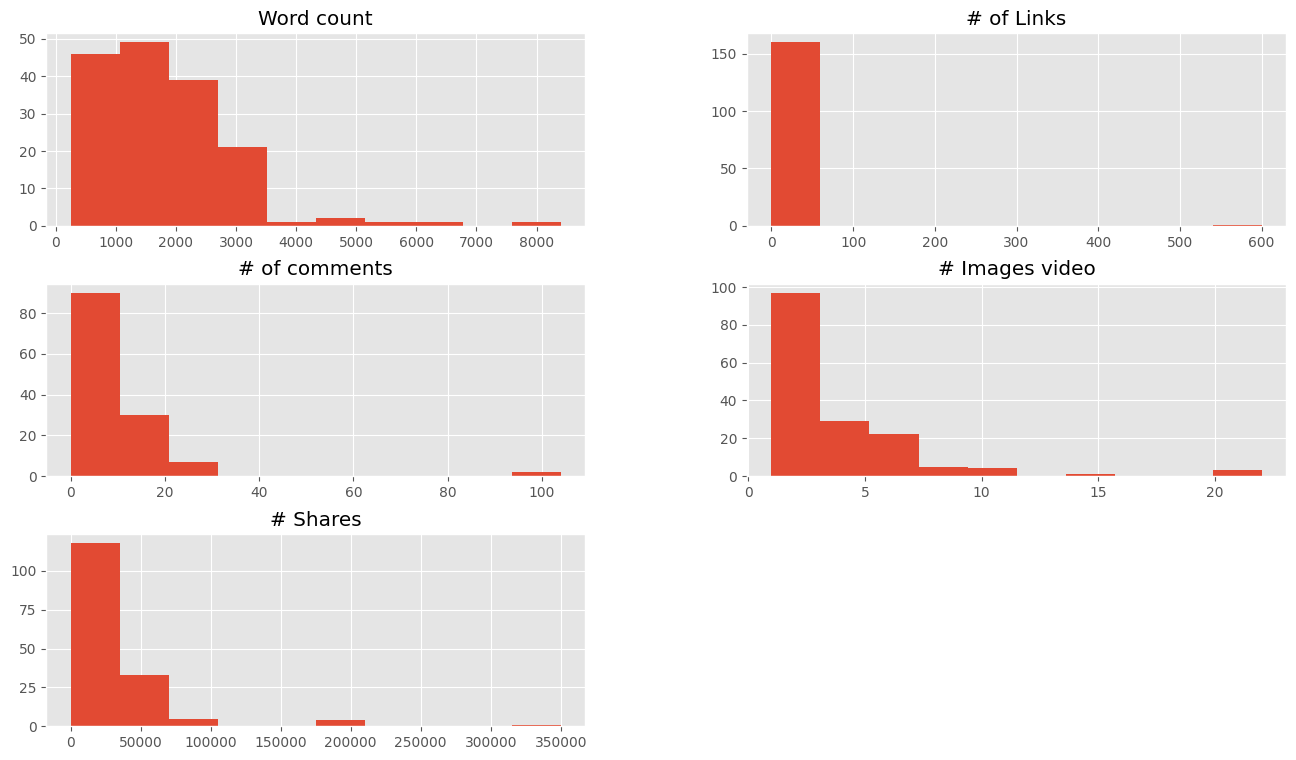

In [8]:
# vamos a ver la distribución de cada variable númerica

data.drop(['Title','url','Elapsed days'], axis = 1).hist()

In [10]:
# Estamos filtrando para quedarnos solo con los renglones que cumplan ambas caracteristicas:
# Menor o igual a 3500 en Word Count y menor o igual a 80000 en # Shares
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

In [11]:
#Cuántos renglones y cuántas columnas
filtered_data.shape

(148, 8)

In [12]:
colores = ['orange', 'blue']

In [13]:
tamanios = [30,60]

In [14]:
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

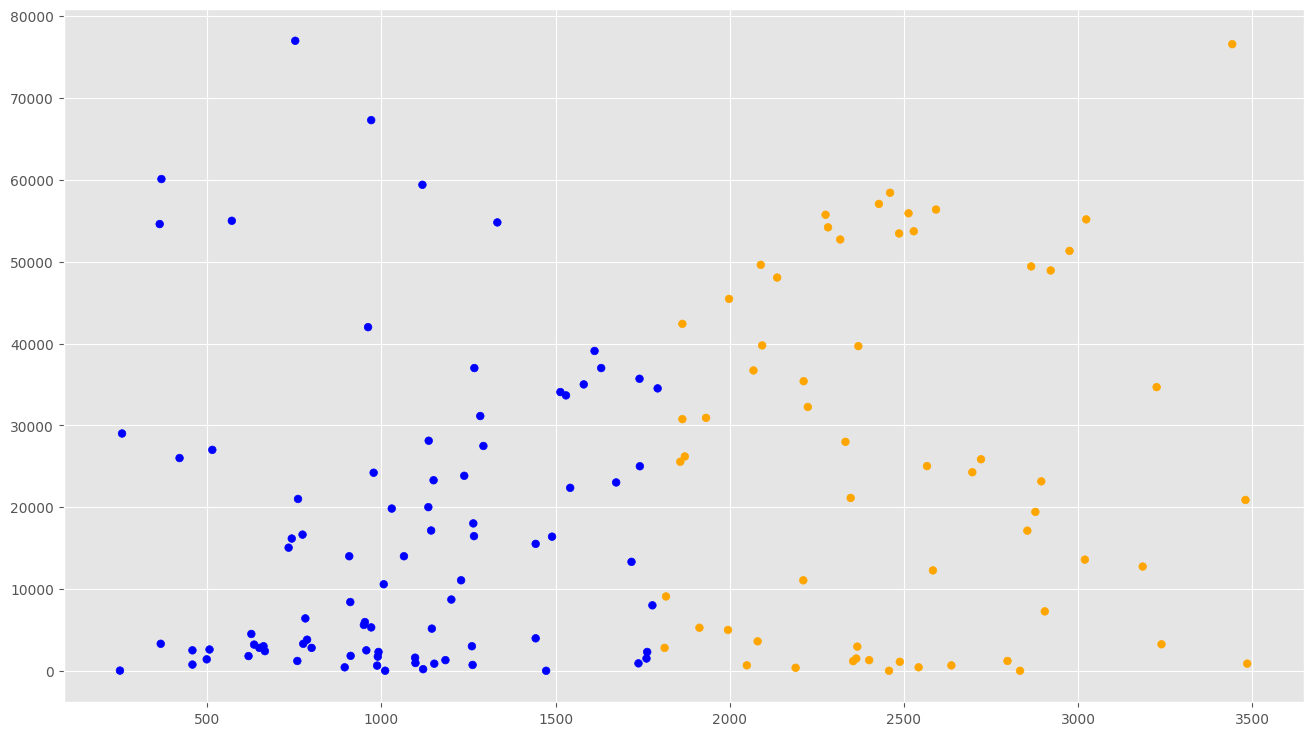

In [16]:
asignar = []

for index, row in filtered_data.iterrows():
    if(row['Word count'] > 1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])

In [17]:
# Crear mis datos de entrada para el modelo
dataX = filtered_data[['Word count']]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [18]:
# Crear mi variable que va a contener lo necesario para realizar el modelo
regr = linear_model.LinearRegression()

In [19]:
# Entrenar el modelo con la función fit
regr.fit(X_train, y_train)

LinearRegression()

In [20]:
# Revisar la pendiente calculada
print('Pendiente: \n', regr.coef_)

Pendiente: 
 [5.69765366]


In [21]:
# Revisar la intersección de la linea
print('Intersección de la linea: \n', regr.intercept_)

Intersección de la linea: 
 11200.30322307416


In [22]:
# Generar predicciones
y_pred = regr.predict(X_train)

In [23]:
y_train[:5]

array([25000, 42000, 21000, 77000, 59400])

In [24]:
y_pred[:5]

array([21125.61589425, 16681.44604148, 15536.21765635, 15490.63642709,
       17570.28001204])

Text(0.5, 1.0, 'Regresión lineal')

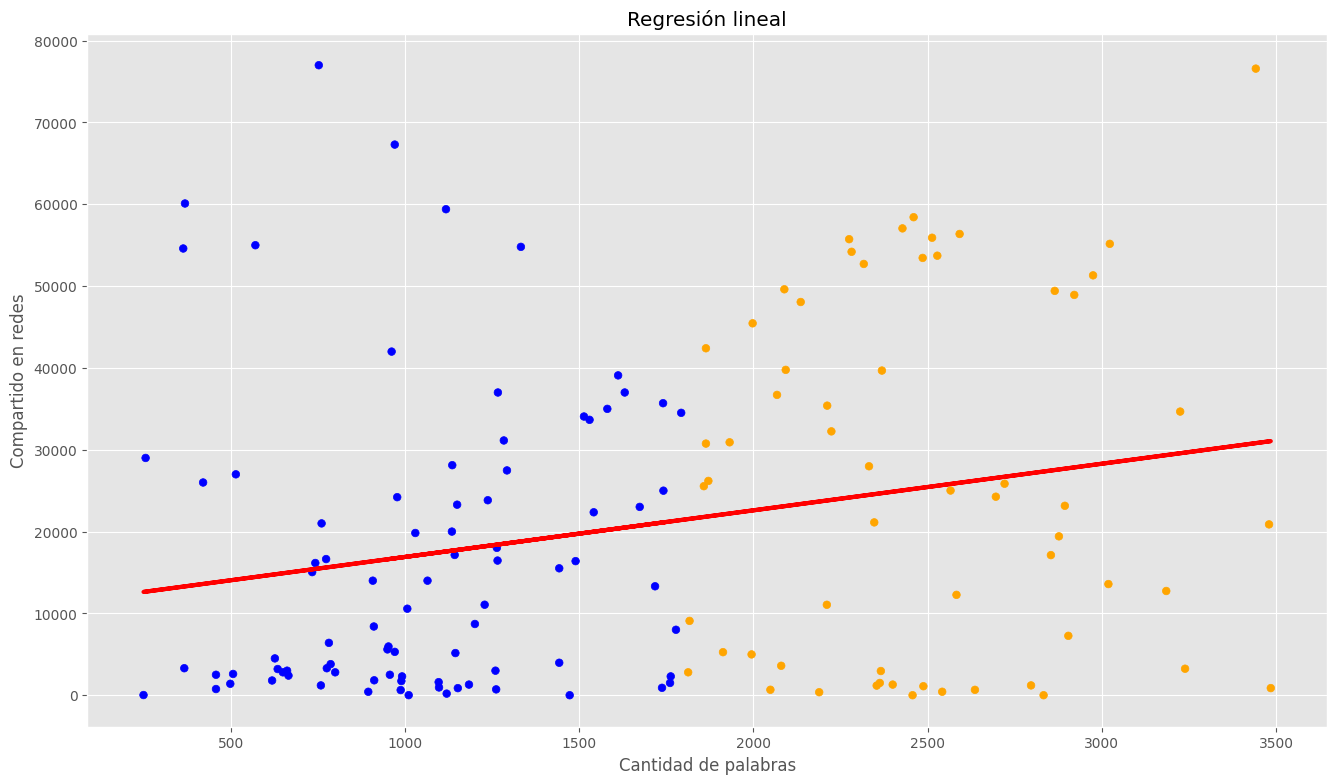

In [26]:
plt.scatter(X_train[:,0], y_train, c= asignar, s= tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Compartido en redes')
plt.title('Regresión lineal')

In [27]:
y_pred_2mil = regr.predict([[2000]])
y_pred_2mil

array([22595.61053785])

In [28]:
# Parte de la evaluación
r2_score(y_train, y_pred)

0.05519842281951404